In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
#import choroplethNYC as cp
import matplotlib.pylab as pl
%matplotlib inline
import io
import os
from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False

In [2]:
# Shapefile for subway station 
import urllib.request

In [16]:
subway = urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=Shapefile","file.gz")

In [17]:
!unzip file.gz

Archive:  file.gz
  inflating: geo_export_b97cd3f9-b287-4474-b3bd-cbfcb0fa8667.dbf  
  inflating: geo_export_b97cd3f9-b287-4474-b3bd-cbfcb0fa8667.shp  
  inflating: geo_export_b97cd3f9-b287-4474-b3bd-cbfcb0fa8667.shx  
  inflating: geo_export_b97cd3f9-b287-4474-b3bd-cbfcb0fa8667.prj  


In [18]:
subshp = GeoDataFrame.from_file("geo_export_b97cd3f9-b287-4474-b3bd-cbfcb0fa8667.shp")

In [19]:
subshp

line                         name  \
0      4-6-6 Express                     Astor Pl   
1      4-6-6 Express                     Canal St   
2                1-2                      50th St   
3              2-3-4                    Bergen St   
4                3-4             Pennsylvania Ave   
5                  1                     238th St   
6              A-B-C    Cathedral Pkwy (110th St)   
7                A-C       Kingston - Throop Aves   
8              E-M-R                      65th St   
9              E-M-R                      36th St   
10             J-M-Z       Delancey St - Essex St   
11               J-Z               Van Siclen Ave   
12               J-Z                  Norwood Ave   
13               J-Z              104th-102nd Sts   
14         B-D-N-Q-R                   DeKalb Ave   
15               A-S               Beach 105th St   
16               A-S                Beach 90th St   
17               2-5                   Freeman St   
18               2-5                Intervale Ave   
19               B-D              182nd-183rd Sts   
20               B-D              174th-175th Sts   
21               B-D                     167th St   
22       7-7 Express         Mets - Willets Point   
23       7-7 Express                Junction Blvd   
24       7-7 Express           Flushing - Main St   
25       6-6 Express                    Buhre Ave   
26       6-6 Express           3rd Ave - 138th St   
27       6-6 Express              Castle Hill Ave   
28   4-5-6-6 Express  Brooklyn Bridge - City Hall   
29       6-6 Express                   Zerega Ave   
..               ...                          ...   
443            A-C-E                      14th St   
444              3-4                 Nostrand Ave   
445              2-3                     Clark St   
446              A-C                 Franklin Ave   
447              A-C    Clinton - Washington Aves   
448                M                   Forest Ave   
449    4-6-6 Express                     110th St   
450  4-5-6-6 Express                      86th St   
451                F                      York St   
452              A-C                      High St   
453              A-C                Lafayette Ave   
454              2-5                 President St   
455                4                     Woodlawn   
456    4-6-6 Express                  Bleecker St   
457    4-6-6 Express                     103rd St   
458            A-C-S                   Euclid Ave   
459              A-S                      88th St   
460                Q                 Cortelyou Rd   
461    4-6-6 Express                     116th St   
462      6-6 Express                  Parkchester   
463              1-2                  Franklin St   
464              A-S                      80th St   
465      7-7 Express          5th Ave - Bryant Pk   
466    4-6-6 Express                    Spring St   
467  4-5-6-6 Express                     125th St   
468          D-F-N-Q  Coney Island - Stillwell Av   
469      7-7 Express       34th St - Hudson Yards   
470                Q                      72nd St   
471                Q                      86th St   
472                Q                      96th St   

                                                 notes  objectid  \
0    4 nights, 6-all times, 6 Express-weekdays AM s...       1.0   
1    4 nights, 6-all times, 6 Express-weekdays AM s...       2.0   
2                                1-all times, 2-nights       3.0   
3             4-nights, 3-all other times, 2-all times       4.0   
4                          4-nights, 3-all other times       5.0   
5                    1-all times, exit only northbound       6.0   
6    A-nights, B-weekdays and evenings, C-all times...       7.0   
7                          A-nights, C-all other times       8.0   
8    E-nights, R-all other times, M-weekdays and ev...       9.0   
9    E-nights, R-all other times, M-weekdays and 

In [20]:
subshp['geometry']

0      POINT (-73.99106999861966 40.73005400028978)
1      POINT (-74.00019299927328 40.71880300107709)
2      POINT (-73.98384899986625 40.76172799961419)
3      POINT (-73.97499915116808 40.68086213682956)
4      POINT (-73.89488591154061 40.66471445143568)
5      POINT (-73.90087000018522 40.88466700064975)
6      POINT (-73.95806670661364 40.80058155811496)
7      POINT (-73.94085899871263 40.67991899941601)
8       POINT (-73.8987883783301 40.74971952935675)
9      POINT (-73.92901818461539 40.75196004401078)
10     POINT (-73.98740940202974 40.71830605618619)
11     POINT (-73.89165772702445 40.67802821447783)
12     POINT (-73.87962599910783 40.68152000045683)
13     POINT (-73.84443500029684 40.69516599823373)
14     POINT (-73.98177094440949 40.69064811996979)
15     POINT (-73.82758075034528 40.58326843810286)
16     POINT (-73.81365140419632 40.58809156457325)
17     POINT (-73.89175225349464 40.82998744638412)
18     POINT (-73.89661738461646 40.82214213117079)
19     POINT

In [21]:
len(subshp)

473

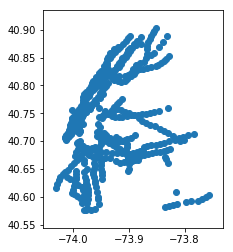

In [22]:
subshp.plot()

In [9]:
# Puma shapeshile 

In [10]:
subway = urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile","puma.gz")

In [11]:
!unzip puma.gz

Archive:  puma.gz
  inflating: geo_export_22e18bb0-be4f-4b5f-bb02-774602d988f3.dbf  
  inflating: geo_export_22e18bb0-be4f-4b5f-bb02-774602d988f3.shp  
  inflating: geo_export_22e18bb0-be4f-4b5f-bb02-774602d988f3.shx  
  inflating: geo_export_22e18bb0-be4f-4b5f-bb02-774602d988f3.prj  


In [12]:
pumashp = GeoDataFrame.from_file("geo_export_3959971a-311c-4fbc-bd00-33a6934737fb.shp")

In [13]:
#cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

NameError: name 'cp' is not defined

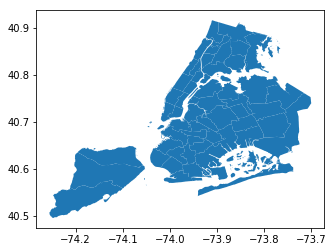

In [56]:
pumashp.plot()